In [35]:
import warnings
import pandas as pd
import scanpy as sc
import numpy as np
import scrublet as scr
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

# Process adata object

In [36]:
adata = sc.read_h5ad("/data/class/cosmos2023/PUBLIC/schthroumpf/scanpy/gastroc_adata.h5ad")

In [37]:
#sc.pp.filter_cells(adata, min_genes=300)
#sc.pp.filter_genes(adata, min_cells=3)


In [38]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


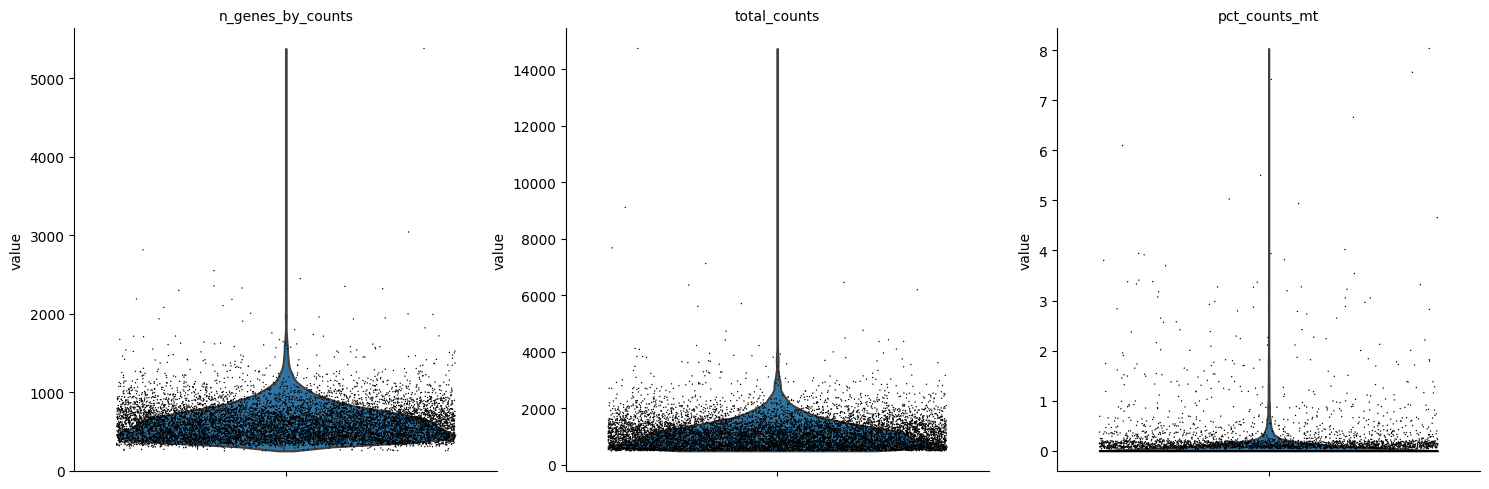

In [39]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

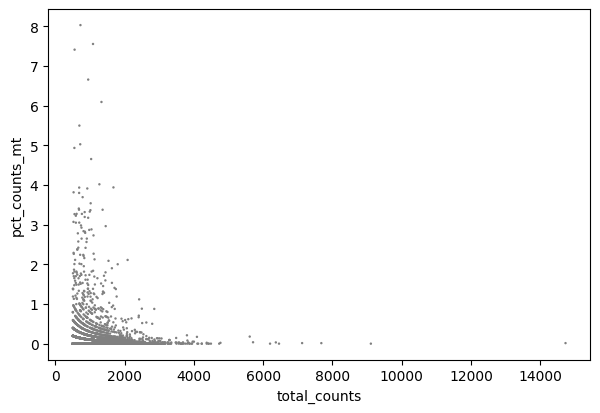

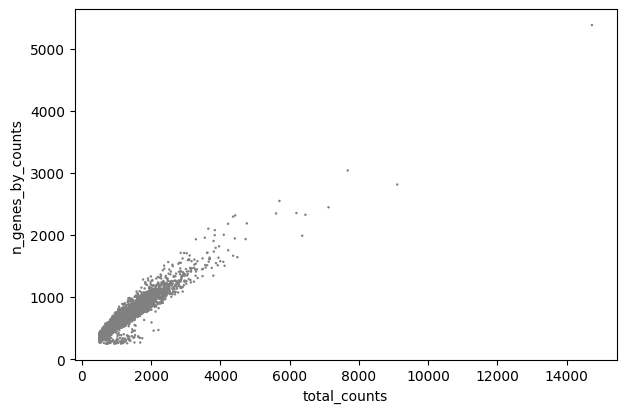

In [40]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [41]:
#adata = adata[adata.obs.n_genes_by_counts < 2500, :]
#adata = adata[adata.obs.pct_counts_mt < 10, :]

In [42]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [43]:
sc.pp.log1p(adata)

In [44]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [45]:
adata.raw = adata

In [46]:
adata = adata[:, adata.var.highly_variable]

In [48]:
sc.tl.pca(adata, svd_solver='arpack')

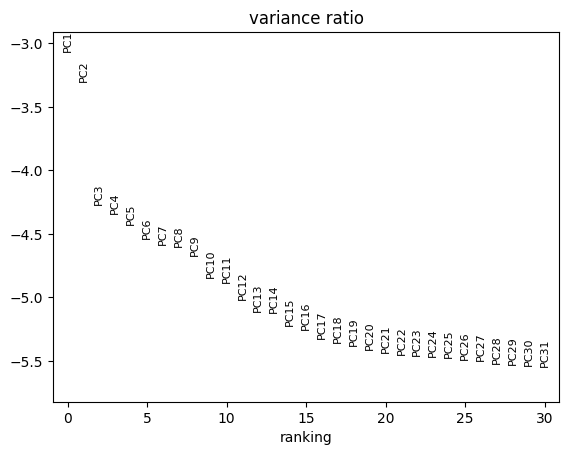

In [49]:
sc.pl.pca_variance_ratio(adata, log=True)

In [50]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

In [51]:
# calculate UMAP 
sc.tl.umap(adata)

In [52]:
# run leiden clustering
sc.tl.leiden(adata)

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


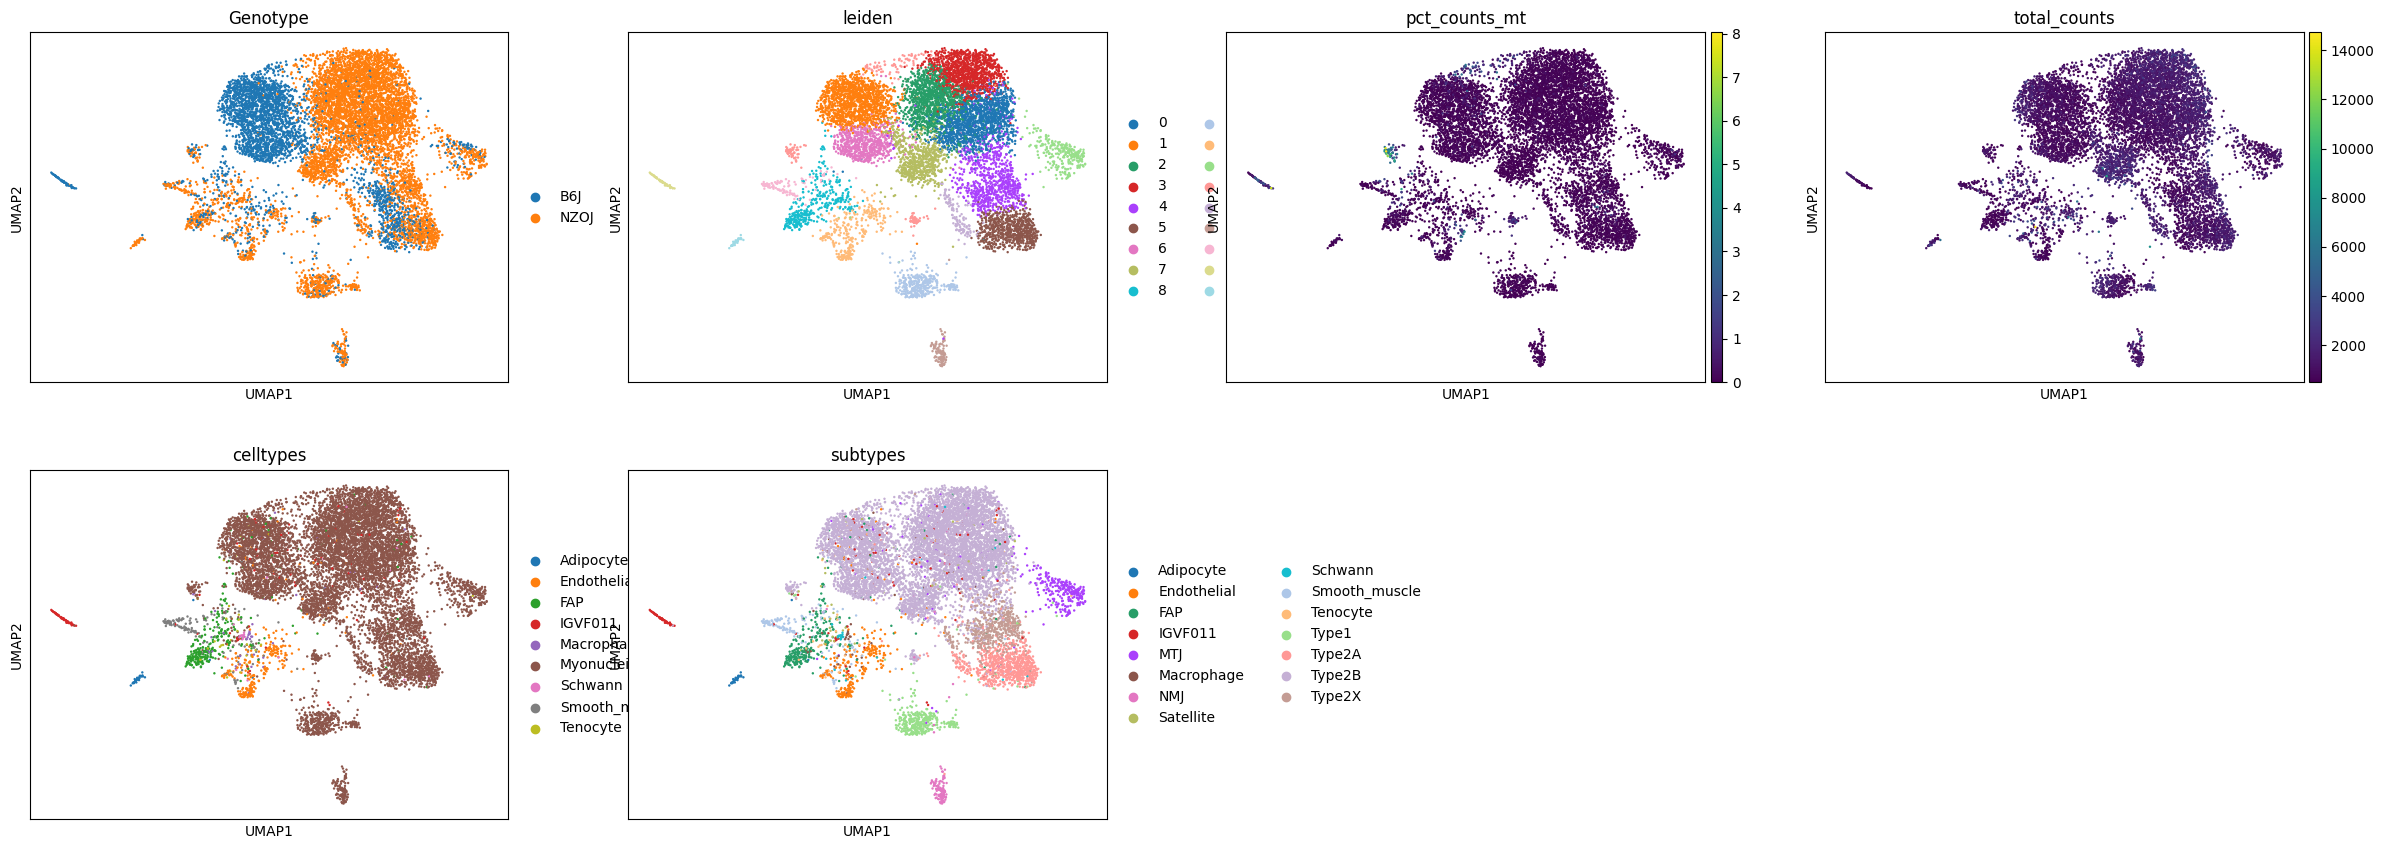

In [54]:
sc.pl.umap(adata, color=['Genotype','leiden', 'pct_counts_mt', 'total_counts', 'celltypes', 'subtypes'])

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


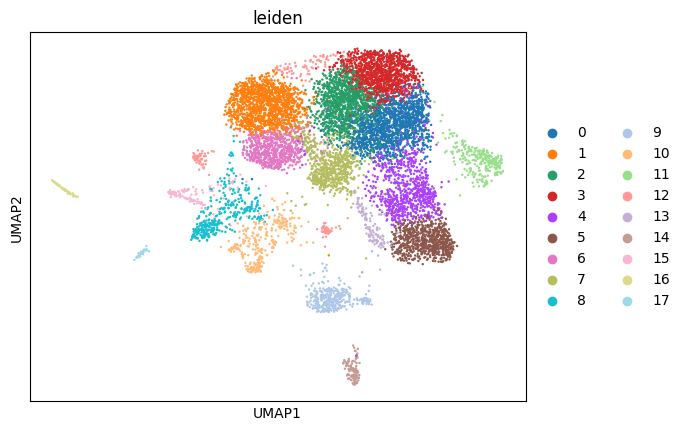

In [56]:
sc.pl.umap(adata, color=['leiden'])

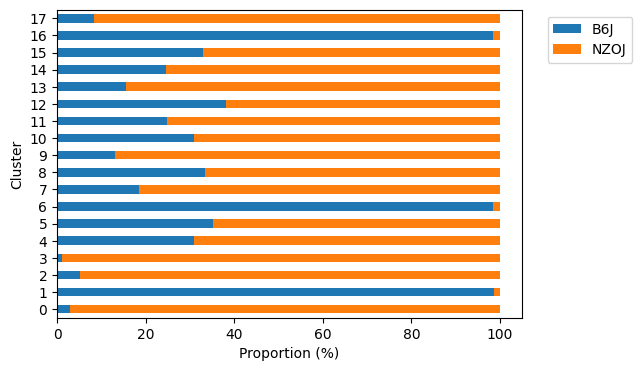

In [55]:
category_proportions = pd.crosstab(adata.obs['leiden'], adata.obs['Genotype']).apply(lambda x: x / x.sum(), axis=1) * 100

# Plot the bar plot
ax = category_proportions.plot(kind='barh', stacked=True)

# Add labels
plt.xlabel('Proportion (%)')
plt.ylabel('Cluster')


# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

# Set the desired width and height in inches
width = 6
height = 4
fig = plt.gcf()
fig.set_size_inches(width, height)

# Save the plot as a PNG file with high quality
output_file = 'tissue_barplot.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


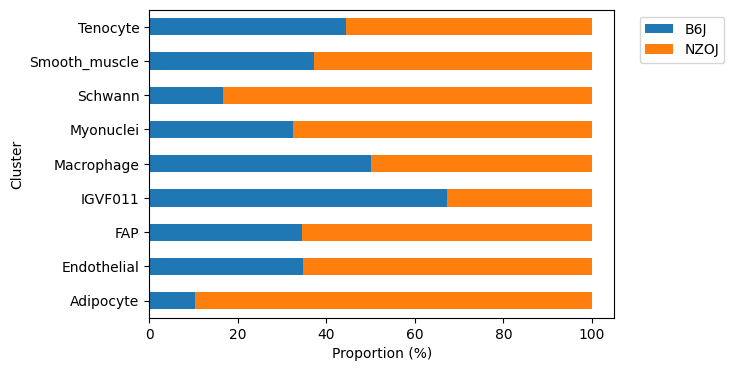

In [58]:
category_proportions = pd.crosstab(adata.obs['celltypes'], adata.obs['Genotype']).apply(lambda x: x / x.sum(), axis=1) * 100

# Plot the bar plot
ax = category_proportions.plot(kind='barh', stacked=True)

# Add labels
plt.xlabel('Proportion (%)')
plt.ylabel('Cluster')


# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

# Set the desired width and height in inches
width = 6
height = 4
fig = plt.gcf()
fig.set_size_inches(width, height)

# Save the plot as a PNG file with high quality
output_file = 'tissue_barplot.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


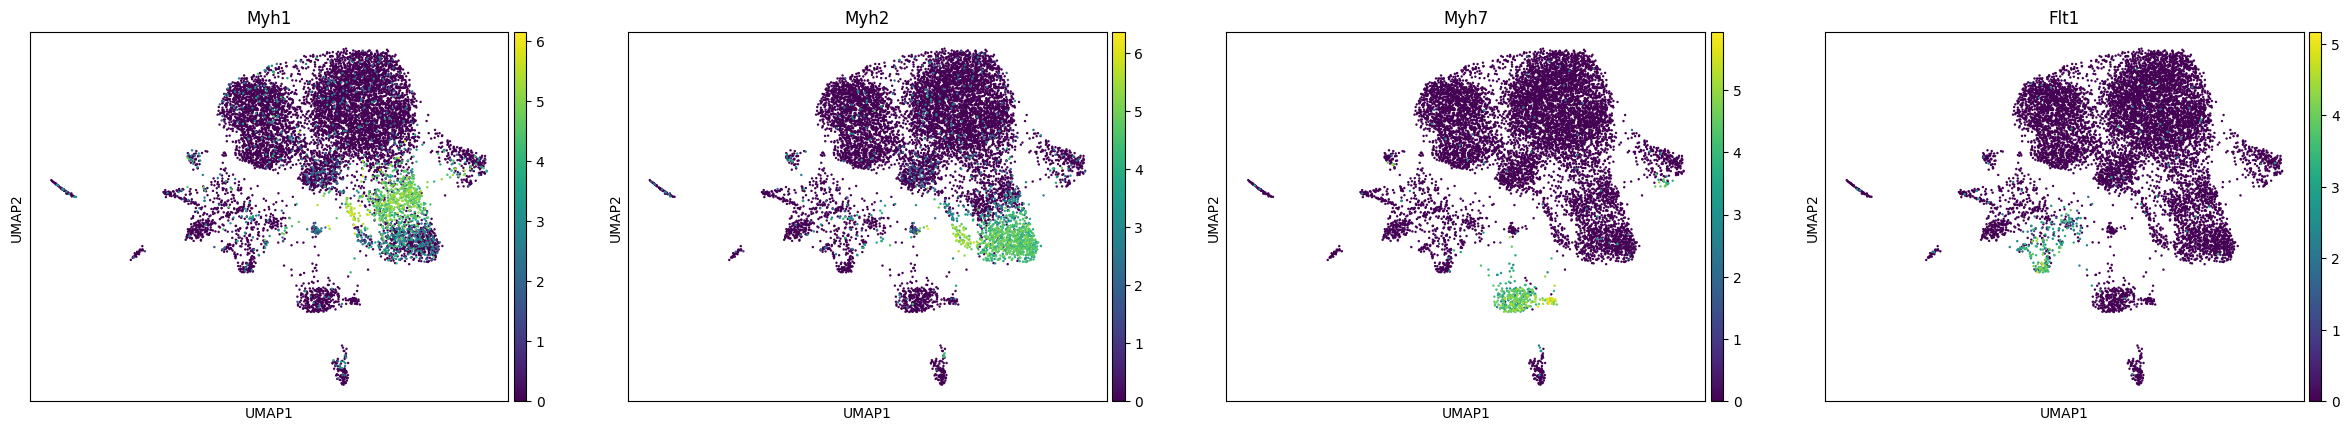

In [59]:
sc.pl.umap(adata, color=['Myh1','Myh2', 'Myh7','Flt1' ])